In [163]:
import numpy as np
import pandas as pd

In [164]:
# load Data
data = pd.read_excel('BA_AirlineReviews_CL_excel.xlsx')
display(data.head())
data.describe()

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,Very Dissatisfied,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,Neutral,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,2023-11-01,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,Enthusiastic,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,2023-11-01,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,Very Dissatisfied,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,2022-12-01,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,Very Dissatisfied,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,2023-11-01,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


,id,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Food&Beverages,InflightEntertainment,Wifi&Connectivity
count,3701.000000,3585.000000,3574.000000,2855.000000,3700.000000,3315.000000,2551.000000,609.000000
mean,1850.000000,2.875314,3.254057,2.784238,2.688378,2.713122,2.646021,1.924466
std,1068.531001,1.362081,1.489709,1.457058,1.471887,1.437092,1.398509,1.352705
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,925.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1850.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
75%,2775.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,3700.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [165]:
# melihat tipe data pada setiap kolom
print(data.dtypes)

id                                int64
Satisfaction                     object
ReviewHeader                     object
Name                             object
Datetime                         object
VerifiedReview                     bool
ReviewBody                       object
TypeOfTraveller                  object
SeatType                         object
Route                            object
DateFlown                datetime64[ns]
SeatComfort                     float64
CabinStaffService               float64
GroundService                   float64
ValueForMoney                   float64
Recommended                      object
Aircraft                         object
Food&Beverages                  float64
InflightEntertainment           float64
Wifi&Connectivity               float64
dtype: object


In [166]:
data.isnull().sum()

id                          0
Satisfaction                0
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64

== Preposesing Data ==

In [167]:
# Menangani missing value pada kolom Numerik dnegan imputasi KNN
from sklearn.impute import KNNImputer
# Periksa apakah kolom 'DateFlown' berisi NaN
print("Missing values in 'DateFlown':", data['DateFlown'].isnull().sum())

# Buat kolom 'DateFlown_numeric' dengan konversi aman
data['DateFlown_numeric'] = data['DateFlown'].apply(
    lambda x: pd.Timestamp(x).timestamp() if pd.notnull(x) else np.nan)

# Gabungkan semua kolom numerik untuk KNN imputasi
features = [
    'SeatComfort', 'CabinStaffService', 'GroundService', 'ValueForMoney',
    'Food&Beverages', 'InflightEntertainment', 'DateFlown_numeric'
]

# Terapkan KNN imputasi
imputer = KNNImputer(n_neighbors=5)
knn_imputed = imputer.fit_transform(data[features])

# Masukkan kembali hasil imputasi ke dalam dataset
data[features] = knn_imputed

# Konversi 'DateFlown_numeric' kembali ke format datetime
data['DateFlown'] = pd.to_datetime(data['DateFlown_numeric'], unit='s')

# Hapus kolom 'DateFlown_numeric' jika tidak diperlukan lagi
data.drop(columns=['DateFlown_numeric'], inplace=True)

# Lanjutkan proses ekstraksi fitur waktu
data['Month'] = data['DateFlown'].dt.month
data['DayOfWeek'] = data['DateFlown'].dt.dayofweek

# Lakukan one-hot encoding untuk 'Month' dan 'DayOfWeek'
data = pd.get_dummies(data, columns=['Month'], prefix='Month')
data = pd.get_dummies(data, columns=['DayOfWeek'], prefix='DayOfWeek')

# Verifikasi hasil
print(data.head())

# Periksa jumlah missing value setelah imputasi
print("Missing values after KNN Imputation:\n", data.isnull().sum())


# DayOfWeek_0 itu Senin, DayOfWeek_1 itu Selasa, dst


Missing values in 'DateFlown': 778
   id       Satisfaction                              ReviewHeader  \
0   0  Very Dissatisfied    "Service level far worse then Ryanair"   
1   1            Neutral  "do not upgrade members based on status"   
2   2       Enthusiastic             "Flight was smooth and quick"   
3   3  Very Dissatisfied             "Absolutely hopeless airline"   
4   4  Very Dissatisfied        "Customer Service is non existent"   

               Name            Datetime  VerifiedReview  \
0           L Keele  19th November 2023            True   
1      Austin Jones  19th November 2023            True   
2        M A Collie  16th November 2023           False   
3        Nigel Dean  16th November 2023            True   
4  Gaylynne Simpson  14th November 2023           False   

                                          ReviewBody TypeOfTraveller  \
0  4 Hours before takeoff we received a Mail stat...  Couple Leisure   
1  I recently had a delay on British Airways 

In [168]:
# menangani missing value pada kolom 'TypeOfTraveller' menggunakan nilai acak dari kolom tersebut
data['TypeOfTraveller'].fillna(data['TypeOfTraveller'].dropna().sample(n=1).values[0], inplace=True)
# tampilkan missing value pada kolom 'TypeOfTraveller'
print(data['TypeOfTraveller'].isnull().sum())
data['TypeOfTraveller'].describe()

0


count             3701
unique               4
top       Solo Leisure
freq              1662
Name: TypeOfTraveller, dtype: object

In [169]:
# menangani missing value pada kolom 'SeatType' nilai acak dari kolom tersebut
data['SeatType'].fillna(data['SeatType'].dropna().sample(n=1).values[0], inplace=True)
# tampilkan missing value pada kolom 'SeatType'
print(data['SeatType'].isnull().sum())
data['SeatType'].describe()

0


count              3701
unique                4
top       Economy Class
freq               1929
Name: SeatType, dtype: object

In [170]:
# menangani missing value pada kolom 'Route' nilai acak dari kolom tersebut
data['Route'].fillna(data['Route'].dropna().sample(n=1).values[0], inplace=True)
# tampilkan missing value pada kolom 'Route'
print(data['Route'].isnull().sum())
data['Route'].describe()

0


count                               3701
unique                              1542
top       New York to Nairobi via London
freq                                 776
Name: Route, dtype: object

                             id  VerifiedReview  SeatComfort  \
id                     1.000000       -0.699034     0.122904   
VerifiedReview        -0.699034        1.000000    -0.050375   
SeatComfort            0.122904       -0.050375     1.000000   
CabinStaffService      0.106840       -0.042008     0.590494   
GroundService          0.003575       -0.000862     0.440659   
ValueForMoney          0.227078       -0.101716     0.672558   
Food&Beverages         0.106871        0.005296     0.571695   
InflightEntertainment -0.024197        0.053205     0.436428   
Wifi&Connectivity     -0.131805        0.183174     0.570132   
Month_1               -0.106970        0.075204    -0.010009   
Month_2               -0.096138        0.085698    -0.018087   
Month_3               -0.139743        0.086186    -0.002291   
Month_4               -0.121906        0.043321     0.000900   
Month_5               -0.106162        0.069134    -0.014711   
Month_6               -0.116105        0

C:\Users\waisl\AppData\Local\Temp\ipykernel_34716\2941058908.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


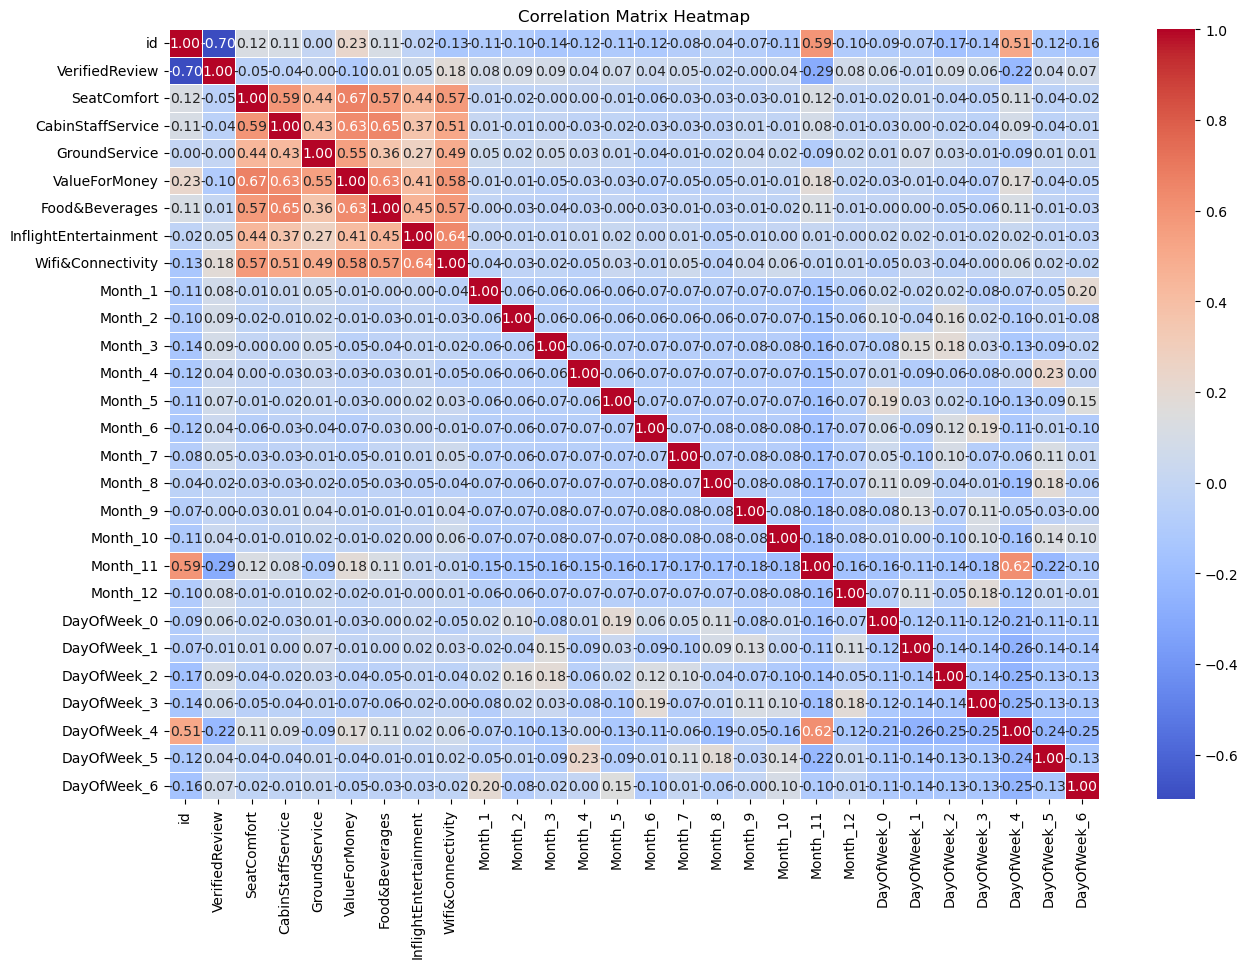

In [171]:
import seaborn as sns

# pengecekan correlation antar kolom sebelum melakukan encoding
correlation = data.corr()
print(correlation)
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(15, 10))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [172]:
# meanangani missing value pada kolom 'Aircraft' menggunakan model prediksi Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoder untuk kolom kategorikal
label_encoder = LabelEncoder()

# Encode kolom Aircraft yang tidak NaN
data['Aircraft_encoded'] = label_encoder.fit_transform(data['Aircraft'].astype(str))

# Split data: rows with missing and without missing values
train_data = data[data['Aircraft'].notnull()].copy()
missing_data = data[data['Aircraft'].isnull()].copy()

# Fitur untuk model prediksi
features = ['Route', 'TypeOfTraveller', 'SeatComfort', 'CabinStaffService']
train_data = train_data.dropna(subset=features)  # Pastikan fitur tidak ada NaN
X_train = pd.get_dummies(train_data[features], drop_first=True)
y_train = train_data['Aircraft_encoded']

# Model untuk memprediksi Aircraft
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi untuk rows dengan missing value
X_missing = pd.get_dummies(missing_data[features], drop_first=True)
X_missing = X_missing.reindex(columns=X_train.columns, fill_value=0)
missing_data.loc[:, 'Aircraft_encoded'] = model.predict(X_missing)

# Masukkan kembali prediksi ke data asli
data.loc[data['Aircraft'].isnull(), 'Aircraft'] = label_encoder.inverse_transform(missing_data['Aircraft_encoded'])
data.drop(columns=['Aircraft_encoded'], inplace=True)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Fitur untuk model prediksi
features = ['SeatComfort', 'ValueForMoney', 'Food&Beverages', 'InflightEntertainment']

# Split data: rows with missing and without missing values
train_data = data[data['Wifi&Connectivity'].notnull()].copy()
missing_data = data[data['Wifi&Connectivity'].isnull()].copy()

# Pastikan fitur tidak ada NaN
train_data = train_data.dropna(subset=features)

# Fitur dan target untuk model
X_train = train_data[features]
y_train = train_data['Wifi&Connectivity']

# Model untuk memprediksi Wifi&Connectivity
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Prediksi untuk rows dengan missing value
X_missing = missing_data[features]
missing_data.loc[:, 'Wifi&Connectivity'] = model.predict(X_missing)

# Masukkan kembali prediksi ke data asli
data.loc[data['Wifi&Connectivity'].isnull(), 'Wifi&Connectivity'] = missing_data['Wifi&Connectivity']

# Verifikasi apakah missing value sudah diimputasi
print(data['Wifi&Connectivity'].isnull().sum())

0


In [174]:
data.isnull().sum()

id                       0
Satisfaction             0
ReviewHeader             0
Name                     0
Datetime                 0
VerifiedReview           0
ReviewBody               0
TypeOfTraveller          0
SeatType                 0
Route                    0
DateFlown                0
SeatComfort              0
CabinStaffService        0
GroundService            0
ValueForMoney            0
Recommended              0
Aircraft                 0
Food&Beverages           0
InflightEntertainment    0
Wifi&Connectivity        0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  0
Month_6                  0
Month_7                  0
Month_8                  0
Month_9                  0
Month_10                 0
Month_11                 0
Month_12                 0
DayOfWeek_0              0
DayOfWeek_1              0
DayOfWeek_2              0
DayOfWeek_3              0
DayOfWeek_4              0
D

In [176]:
display(data.head())
display(data.describe())

,id,Satisfaction,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,...,Month_10,Month_11,Month_12,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,0,Very Dissatisfied,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,...,0,1,0,0,0,1,0,0,0,0
1,1,Neutral,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,...,0,1,0,0,0,1,0,0,0,0
2,2,Enthusiastic,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,...,0,1,0,0,0,1,0,0,0,0
3,3,Very Dissatisfied,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,...,0,0,1,0,0,0,1,0,0,0
4,4,Very Dissatisfied,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,...,0,1,0,0,0,1,0,0,0,0


,id,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Food&Beverages,InflightEntertainment,Wifi&Connectivity,Month_1,Month_2,...,Month_10,Month_11,Month_12,DayOfWeek_0,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
count,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,...,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000,3701.000000
mean,1850.000000,2.888571,3.265118,2.701918,2.688246,2.758065,2.634153,2.193228,0.057282,0.051608,...,0.077006,0.281005,0.064847,0.089435,0.125642,0.118617,0.119697,0.316401,0.113753,0.116455
std,1068.531001,1.345066,1.470704,1.293522,1.471710,1.382826,1.193451,1.116518,0.232412,0.221264,...,0.266637,0.449551,0.246290,0.285410,0.331490,0.323381,0.324651,0.465134,0.317554,0.320813
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,925.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.160165,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1850.000000,3.000000,3.200000,2.400000,3.000000,3.000000,2.600000,1.920000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2775.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.200000,3.048650,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3700.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [175]:
# import tensorflor.keras as keras
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
